# Analyse détaillée

Pour pouvoir utiliser ce programme il est important de faire un upload préalable du fichier CSV récupéré depuis l'enquête Moodle. 
Notez le nom du fichier (qui dois se trouver dans la colonne de gauche) et entrez le dans la cellule ci-dessous.

### Entrer le nom du fichier .CSV à analyser

In [1]:
filename = input()

 Semester_3_course_survey.csv


### Préparation des rapports par cours

['CSE202 - Design and Analysis of Algorithms (2021-2022)'
 'CSE201 - Object-oriented Programming in C++ (2021-2022)'
 'MAA201 - Euclidean and Hermitian Spaces (2021-2022)'
 'MAA202 - Topology and multivariable calculus (2021-2022)'
 'MAA204 - Introduction to Statistics (2021-2022)'
 'PHY203 - Advanced Lab I (2021-2022)'
 'PHY202 - Wave Optics and Radiation (2021-2022)'
 'PHY201 - Classical Mechanics (2021-2022)'
 'MAA203 - Introduction to Probability (2021-2022)'
 'CHE201 - Introduction to Reactivity (2021-2022)'
 'BIO201 - Cell and developmental Biology (2021-2022)'
 'CSE203 - Logic and Proofs (2021-2022)'
 'ECO202 - Intermediate Macroeconomics (2021-2022)'
 'ECO201 - Intermediate Microeconomics (2021-2022)'
 'MAA205 - Algorithms for Discrete Mathematics (2021-2022)'
 'BACH100 - Bachelor Program (2021-2022)']
CSE202 - Design and Analysis of Algorithms (2021-2022)
CSE201 - Object-oriented Programming in C++ (2021-2022)
MAA201 - Euclidean and Hermitian Spaces (2021-2022)
MAA202 - Topolo

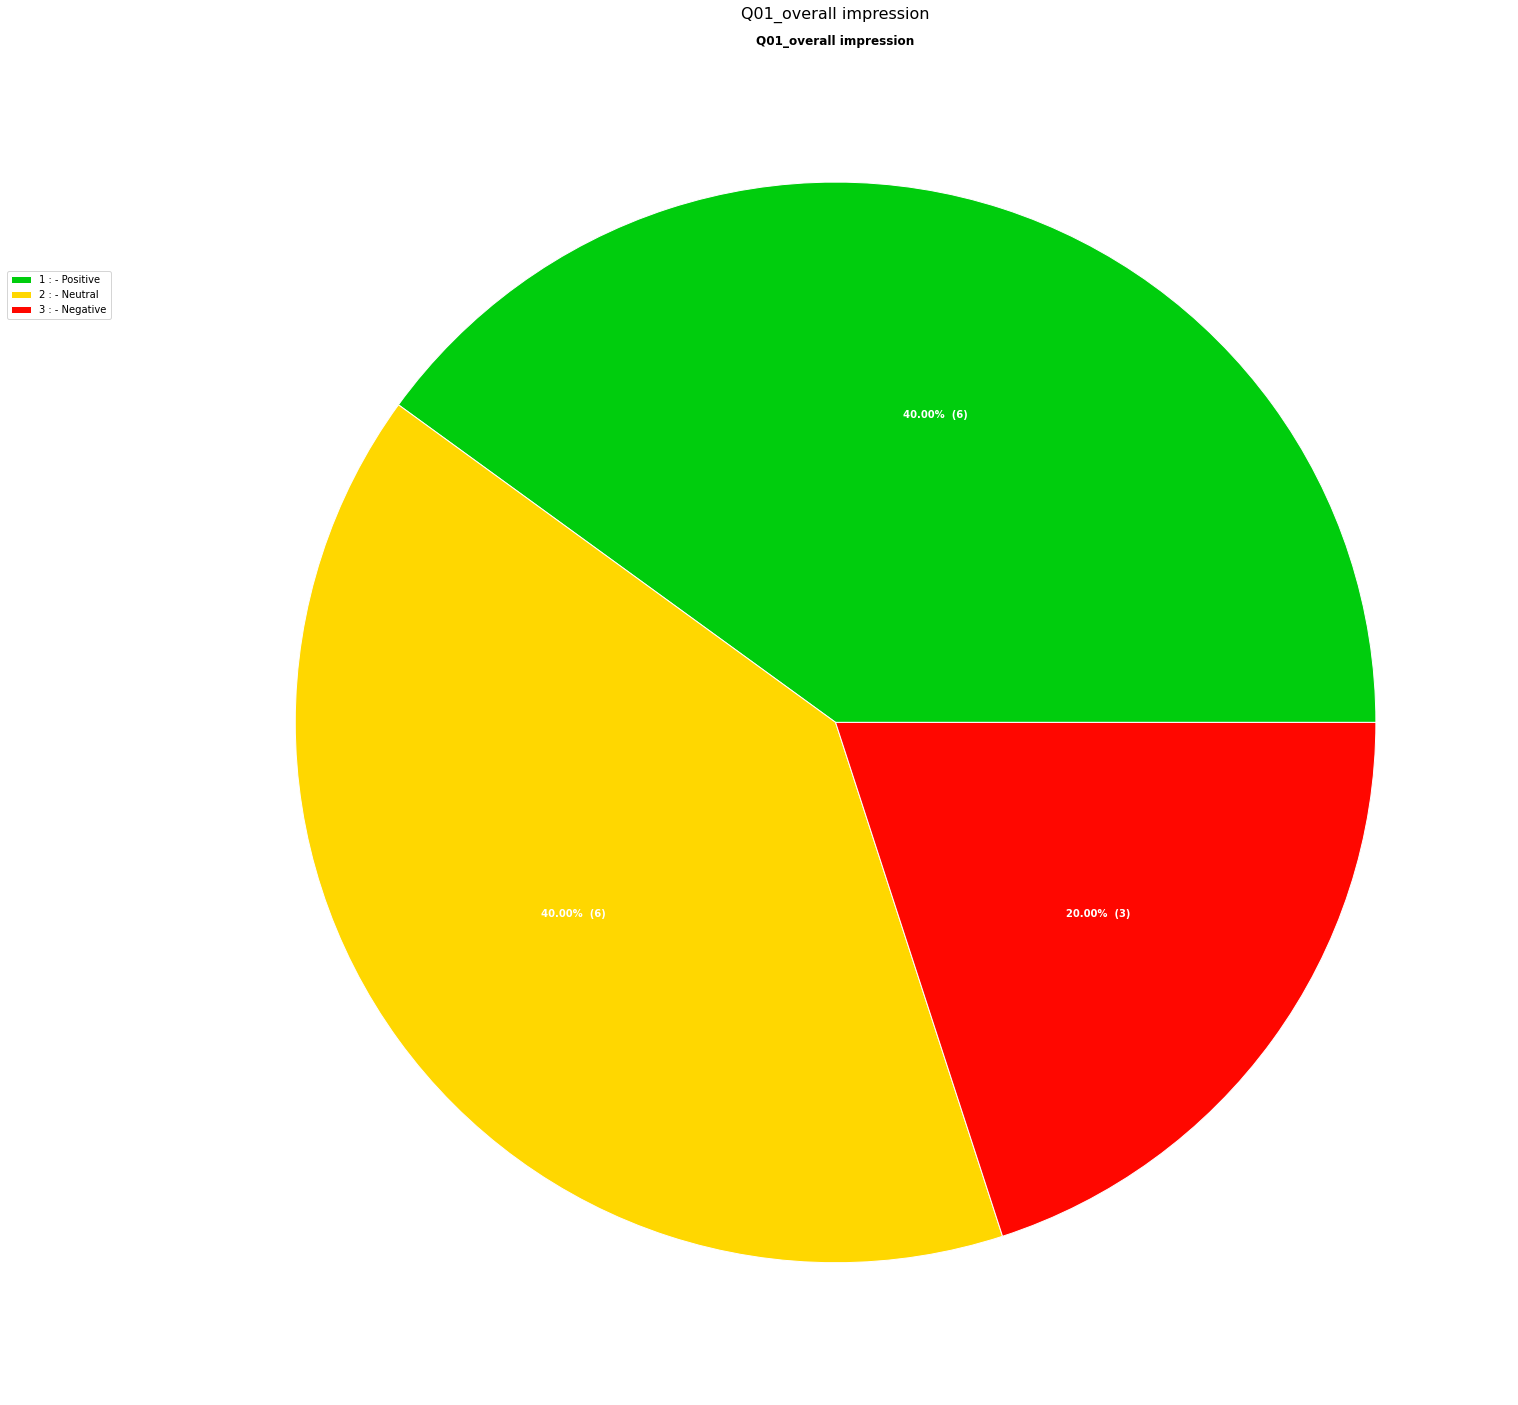

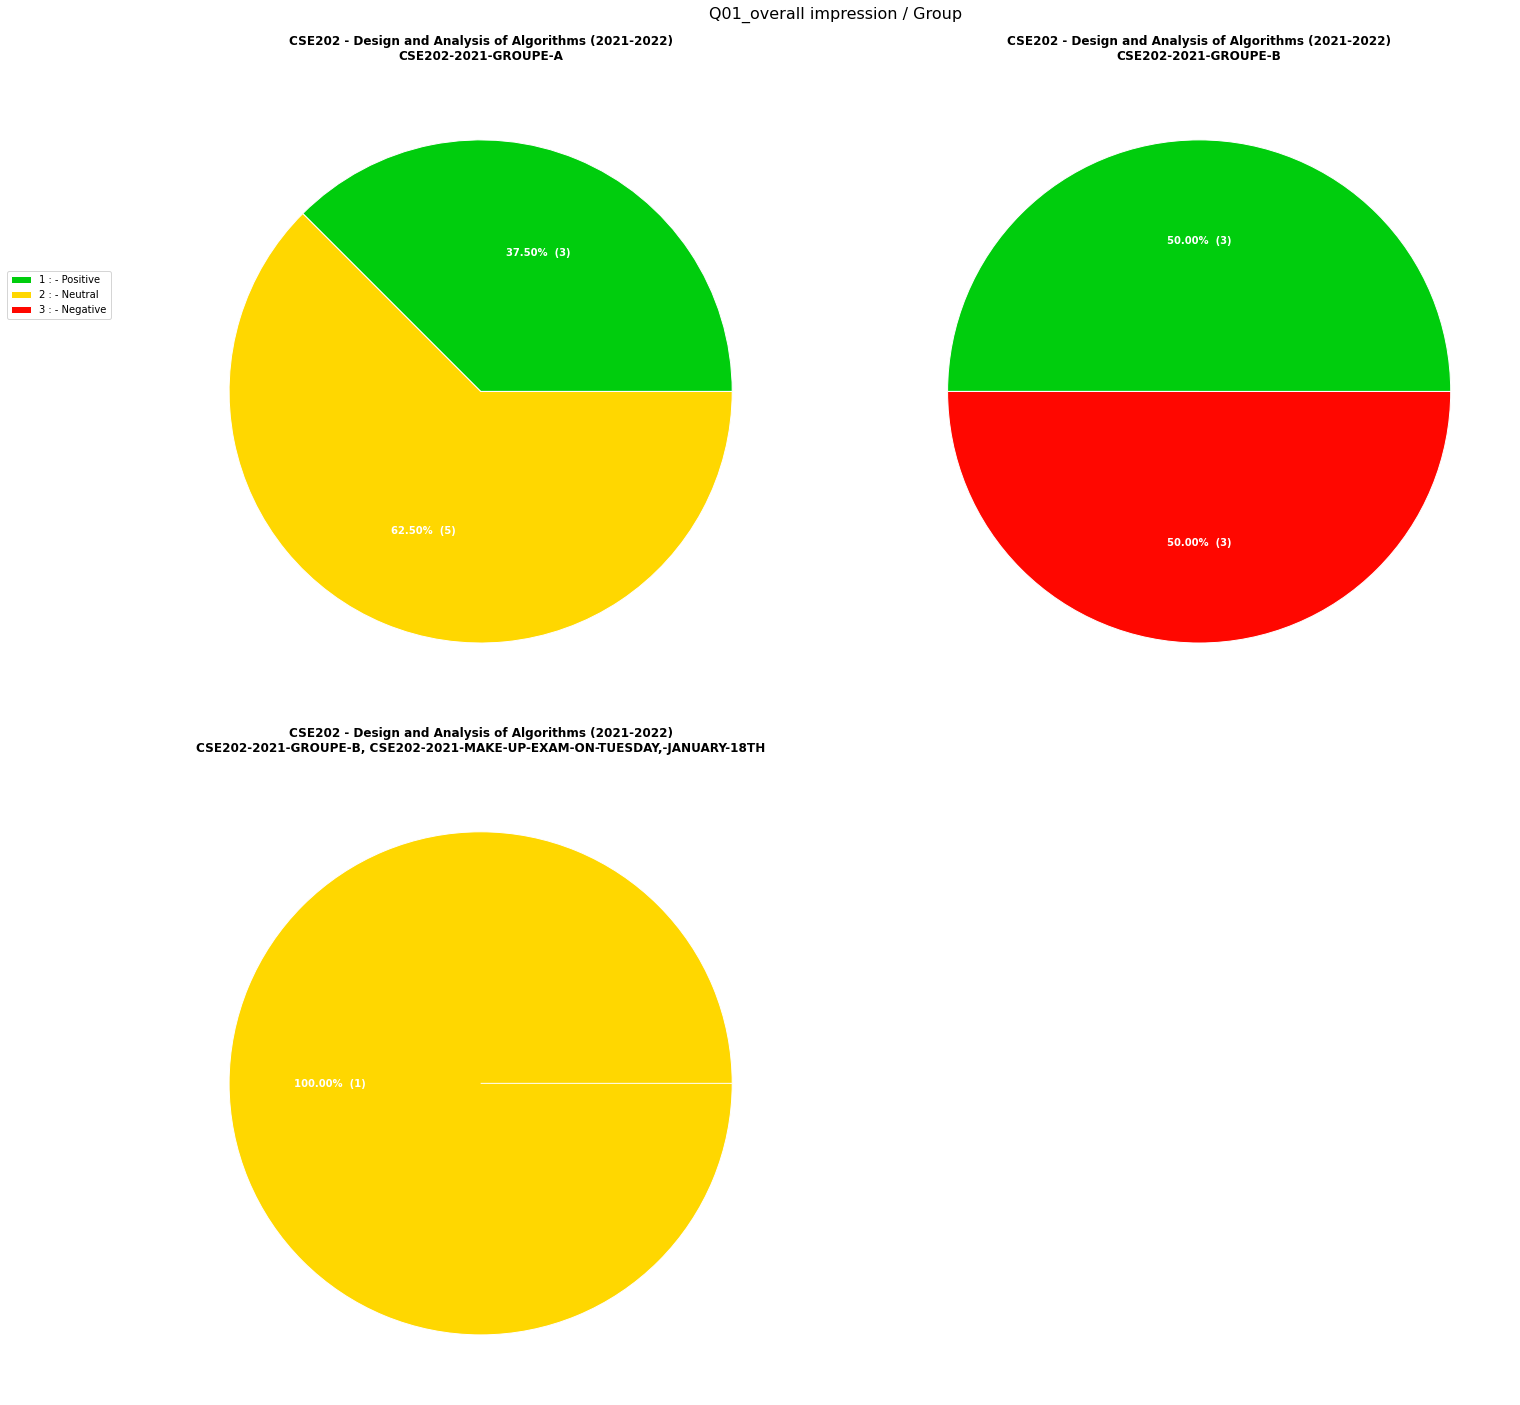

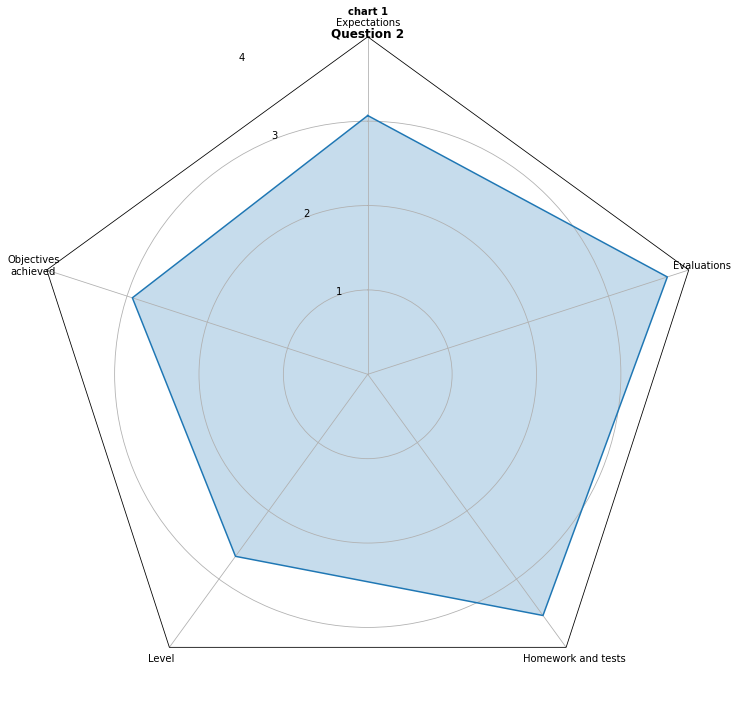

KeyboardInterrupt: 

In [5]:
import pandas as pd
import re
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from matplotlib.backends.backend_pdf import PdfPages
import zipfile
from IPython.core.display import display, HTML

# variable utilisée pour supprimer les lignes saisies dans le cours d'origine
cours_maitre = 'BACH100'

def zip_directory(folder_path, zip_path):
    with zipfile.ZipFile(zip_path, mode='w', compression=zipfile.ZIP_DEFLATED, allowZip64=True) as zipf:
        len_dir_path = len(folder_path)
        for root, _, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, file_path[len_dir_path:])
                
def question (value):
    ''' Renvoie le texte d'une question
        Q02_rating->2- The course's content was clear and the objectives were achieved
    '''
    regex = re.compile('\d+\s?[-–] ')
    return regex.split(value)[1];

# from https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html

def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta
 
def MultiPie(mydf,mytitle):
    # défini le nb de colonnes
    if mydf.shape[1] == 1 :
        ncols = 1
    elif (mydf.shape[1]<7):
        ncols = 2
    elif mydf.shape[1]<13 :
        ncols = 3
    else:
        ncols = 4

    # calcul du nb de ligne
    if mydf.shape[1]%ncols ==0:
        nrows = int(mydf.shape[1]/ncols)
    else:
        nrows = int(mydf.shape[1]/ncols)+1

    #print(f"{mytitle}\nLen:{len(mydf)}\nShape[1]:{mydf.shape[1]}\nncols:{ncols}\nnrows{nrows}")
    cm = 1/2.54
    #fig, axs = plt.subplots(figsize=(29.7*cm,21*cm), nrows=nrows, ncols=ncols, squeeze=False)
    fig, axs = plt.subplots(figsize=(20,20), nrows=nrows, ncols=ncols, squeeze=False)
    #fig.subplots_adjust(wspace=0.25,hspace=0.25,top=0.8,bottom=0.1)
    fig.subplots_adjust(top=0.8)
     
    colors = ['#00CD0D','#FFD700','#FF0700','#3f3075','#9467bd','#3301B5','#e377c2','#7f7f7f','#bcbd22','#17becf','#1a55FF']

    for ax, (title,values) in zip(axs.flat, mydf.items()):
        
        ax.pie(values,labels=[k for k,v in mydf.iterrows()],
            autopct = lambda p : f"{p:.2f}%  ({(p * sum(values)/100):,.0f})" if p > 0 else '',
            wedgeprops={'linewidth': 1, 'edgecolor':'white'},
            textprops={'color':"w",'weight':'bold'},
           colors = colors)
        
        if type(title) is tuple:
            figtitle = ''
            for t in title:
                figtitle +=t +'\n'
        else:
            figtitle = title
        
        ax.set_title(figtitle, weight='bold',size='large',position=(0.5,1.1), horizontalalignment ='center',verticalalignment='center')
        #ax.legend(loc='center left', bbox_to_anchor=(0,0.8))
    
    fig.suptitle(mytitle,fontsize=16, verticalalignment='top', horizontalalignment='center')
    #fig.suptitle(mytitle,fontsize=16,y=0.98, horizontalalignment='center')
    
    # récupère la légende et la place sur la figure
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels,  bbox_to_anchor=(0,0.8))
    
    # supprime les derniers graphes vides
    if mydf.shape[1]%ncols != 0:
        #print(f"{mytitle}*{newtitle}\nLen:{len(mydf)}\nShape[1]:{mydf.shape[1]}\nncols:{ncols}\nnrows{nrows}")
        for n in range(ncols,mydf.shape[1] %ncols,-1):
            #print(f"Delete axs[{nrows-1},{n-1}]")
            fig.delaxes(axs[nrows-1,n-1])
         
    #fig.tight_layout()
    fig.tight_layout(pad=2.0)
    fig.show()
    #fig.savefig(mytitle, dpi=100, transparent=True, bbox_inches='tight')
    return fig

try:
    #data = pd.read_csv('test_course_survey.csv')
    data = pd.read_csv(filename)
except :
    print("Problème de lecture du fichier. Vérifier le nom du fichier .CSV\nSaisir le bon nom de fichier à l'étape précédente.")

#
# Suppression des colonnes d'identification
#
data.drop(data.columns[[2,6,7,8]], axis=1, inplace=True)

#
# Génère un dataset sans les lignes saisies dans le questionnaire maitre
#
data = data[~data['Cours'].str.contains(cours_maitre)]

colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf','#1a55FF']


### Transformation des données Q5
# transforme Q5  en True / False
data[[q for q in data.columns if 'Q05' in q][0]] = data[[q for q in data.columns if 'Q05' in q][0]].astype(bool)

### Génération des données par cours

#Liste des noms de cours
names = data['Cours'].unique()

#Liste des sous-dataFrame
sdata = []
# génère des DF par cours
for i, nom in enumerate(names):
    condition = data['Cours'] == nom
    filtered_rows = data.index[condition].tolist()
    sdata.append(data.iloc[filtered_rows])

### Création des fichiers PDF et Excel
    
for i,data in enumerate(sdata):
    cours = data['Cours'].unique()[0]
    print(cours)
    
    # Crée un dossier 
    os.makedirs(f"OUTPUT/{cours}", exist_ok=True)
    
    # Crée un fichier pdf
    pdf = PdfPages(f"OUTPUT/{cours}/{cours}.pdf")

    # dessine le camembert Q1
    #UniquePie(data[[q for q in data.columns if 'Q01' in q][0]])
    mydf = data[[q for q in data.columns if 'Q01' in q][0]].value_counts().sort_index(ascending=True).to_frame()
    myfig = MultiPie(mydf,[q for q in data.columns if 'Q01' in q][0])
    myfig.savefig(f"OUTPUT/{cours}/Q01.png")
    pdf.savefig(myfig, bbox_inches="tight")

    # dessine Q1 par cours
    mydf = data.pivot_table(index=[q for q in data.columns if 'Q01' in q][0],columns=['Cours','Groupe'],aggfunc='size',fill_value=0)
    myfig = MultiPie(mydf,[q for q in data.columns if 'Q01' in q][0] + ' / Group')
    myfig.savefig(f"OUTPUT/{cours}/Q01g.png")
    pdf.savefig(myfig, bbox_inches="tight")

    #crée le fichier Excel
    data.to_excel(f"OUTPUT/{cours}/{cours}.xlsx", sheet_name='Responses')    
    with pd.ExcelWriter(f"OUTPUT/{cours}/{cours}.xlsx", engine='openpyxl', mode='a') as writer:
        mydf.to_excel(writer, sheet_name='Q1')

    #--------------------
    # dessine Q2
    # Extrait les colonnes et calcul la moyenne
    col = [q for q in data.columns if 'Q02' in q]

    categories = ['Expectations','Objectives\nachieved','Level','Homework and tests','Evaluations']
    #valeurs = ('Global',[data[col].mean().tolist()])
    val1= ('chart 1',[data[col].mean().tolist()])
    val2 = ('',[[]])

    mydata = [categories,val1]
    #print(mydata)
    N = len(categories)
    theta = radar_factory(N, frame='polygon')
    #theta = radar_factory(N, frame='circle')

    spoke_labels = mydata.pop(0)

    fig, axs = plt.subplots(figsize=(20,20), nrows=2, ncols=1,
                            subplot_kw=dict(projection='radar'))
    #fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)
    fig.subplots_adjust(wspace=0.25,hspace=0.25,top=0.85,bottom=0.1)

    colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf','#1a55FF']

    # Plot the four cases from the example data on separate axes
    for ax, (title, case_data) in zip(axs.flat, mydata):
        ax.set_rgrids([1, 2, 3, 4])
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            #print(theta, d, color)
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25)
            ax.set_varlabels(spoke_labels)
            ax.set_ylim(bottom=0,top=4)

    # add legend relative to top-left plot
    labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
    #legend = axs[0, 0].legend(labels, loc=(0.9, .95),
    #                          labelspacing=0.1, fontsize='small')

    plt.yticks([1,2,3,4],color="grey", size=10)

    fig.text(0.5, 0.965, 'Question 2',
             horizontalalignment='center', color='black', weight='bold',
             size='large')

    # supprime le deuxième (vide)
    fig.delaxes(axs[1])

    fig.tight_layout(pad=2.0)
    plt.show()
    fig.savefig(f"OUTPUT/{cours}/Q02.png", dpi=72, transparent=True)
    pdf.savefig(fig, bbox_inches="tight")
    #fig.savefig('Q2_1.png', dpi=100, transparent=True)

    #-----------------------
    # Génération des moyennes par cours
    col = [q for q in data.columns if 'Q02' in q]
    col.append('Groupe')
    df = data[col].groupby('Groupe').mean()

    mydata=[categories]
    for (titre, values) in df.iterrows():
        mydata.append((titre,[values.tolist()]))

    N = len(mydata[0])
    theta = radar_factory(N, frame='polygon')

    # on extrait de la liste les titres
    spoke_labels = mydata.pop(0)

    # nb de graphe par ligne
    # S'il n'y a pas de groupe on ne fait pas de schéma
    if len(df) != 1 :
        # défini le nb de colonnes
        if (len(df)<7):
            ncols = 2
        elif len(df)<13 :
            ncols = 3
        else:
            ncols = 4

        # calcul du nombre de lignes
        if len(df) %ncols == 0:
            nrows = int(len(df)/ncols)
        else:
            nrows = int(len(df)/ncols)+1

        fig, axs = plt.subplots(figsize=(10,10), nrows=nrows, ncols=ncols,
                                subplot_kw=dict(projection='radar'))
        fig.subplots_adjust(wspace=0.20,hspace=0.20,top=0.95,bottom=0.1)     

        colors = ['y', 'r', 'g', 'm', 'b']

        # Plot the four cases from the example data on separate axes
        for ax, (title, case_data) in zip(axs.flat, mydata):
            ax.set_rgrids([1, 2, 3, 4])
            ax.set_title(title, weight='bold', size='large', position=(0.5, 1.1),
                         horizontalalignment='center', verticalalignment='center')
            for d, color in zip(case_data, colors):
                #print(theta, d, color)
                ax.plot(theta, d, color=color)
                ax.fill(theta, d, facecolor=color, alpha=0.25)
                ax.set_varlabels(spoke_labels)
                # ax.set_ylim défini l'échelle de graduation
                ax.set_ylim(bottom=0,top=4)

        plt.yticks([1,2,3,4],color="grey", size=10)
        fig.suptitle('Question 02',fontsize=16, verticalalignment='top', horizontalalignment='center')

        # supprime les derniers graphes vides
        #print(f"Q10\nLen:{len(df)}\nShape[0]:{df.shape[0]}\nShape[1]:{df.shape[1]}\nCategories:{len(categories)}\nncols:{ncols}\nnrows:{nrows}\n")
        if len(df)%ncols != 0:
            if nrows == 1:
                for n in range(ncols,len(df) %ncols,-1):
                    fig.delaxes(axs[n-1])
            else:    
                for n in range(ncols,len(df) %ncols,-1):
                    fig.delaxes(axs[nrows-1,n-1])

        fig.tight_layout(pad=2.0)
        plt.show()
        fig.savefig(f"OUTPUT/{cours}/Q02g.png", dpi=72, transparent=True)
        pdf.savefig(fig, bbox_inches="tight")

    #crée le fichier Excel
    with pd.ExcelWriter(f"OUTPUT/{cours}/{cours}.xlsx", engine='openpyxl', mode='a') as writer:
        df.to_excel(writer, sheet_name='Q2')

    #--------------------------------------Q3
    # dessine le camembert Q3
    mydf = data[[q for q in data.columns if 'Q03' in q][0]].value_counts().sort_index(ascending=True).to_frame()
    myfig = MultiPie(mydf,[q for q in data.columns if 'Q03' in q][0])
    myfig.savefig(f"OUTPUT/{cours}/Q03.png")
    pdf.savefig(myfig, bbox_inches="tight")

    # dessine par cours
    mydf = data.pivot_table(index=[q for q in data.columns if 'Q03' in q][0],columns=['Cours','Groupe'],aggfunc='size',fill_value=0)
    myfig= MultiPie(mydf,[q for q in data.columns if 'Q03' in q][0] + ' / Group')
    myfig.savefig(f"OUTPUT/{cours}/Q03g.png")
    pdf.savefig(myfig, bbox_inches="tight")

    #complete le fichier Excel 
    with pd.ExcelWriter(f"OUTPUT/{cours}/{cours}.xlsx", engine='openpyxl', mode='a') as writer:
        mydf.to_excel(writer, sheet_name='Q3')
        
    #--------------------------------------Q4
    # dessine le camembert Q4
    mydf = data[[q for q in data.columns if 'Q04' in q][0]].value_counts().sort_index(ascending=True).to_frame()
    myfig = MultiPie(mydf,[q for q in data.columns if 'Q04' in q][0])
    myfig.savefig(f"OUTPUT/{cours}/Q04.png")
    pdf.savefig(myfig, bbox_inches="tight")

    # dessine par cours
    mydf = data.pivot_table(index=[q for q in data.columns if 'Q04' in q][0],columns=['Cours','Groupe'],aggfunc='size',fill_value=0)
    myfig = MultiPie(mydf,[q for q in data.columns if 'Q04' in q][0] + ' / Group')
    myfig.savefig(f"OUTPUT/{cours}/Q04g.png")
    pdf.savefig(myfig, bbox_inches="tight")

    #complete le fichier Excel 
    with pd.ExcelWriter(f"OUTPUT/{cours}/{cours}.xlsx", engine='openpyxl', mode='a') as writer:
        mydf.to_excel(writer, sheet_name='Q4')
        
    #--------------------------------------Q5
    # dessine le camembert Q5
    mydf = data[[q for q in data.columns if 'Q05' in q][0]].value_counts().sort_index(ascending=True).to_frame()
    myfig = MultiPie(mydf,[q for q in data.columns if 'Q05' in q][0])
    myfig.savefig(f"OUTPUT/{cours}/Q05.png")
    pdf.savefig(myfig, bbox_inches="tight")

    # dessine par cours
    mydf = data.pivot_table(index=[q for q in data.columns if 'Q05' in q][0],columns=['Cours','Groupe'],aggfunc='size',fill_value=0)
    myfig = MultiPie(mydf,[q for q in data.columns if 'Q05' in q][0] + ' / Group')
    myfig.savefig(f"OUTPUT/{cours}/Q05g.png")
    pdf.savefig(myfig, bbox_inches="tight")

    #complete le fichier Excel 
    with pd.ExcelWriter(f"OUTPUT/{cours}/{cours}.xlsx", engine='openpyxl', mode='a') as writer:
        mydf.to_excel(writer, sheet_name='Q5')
    
    #--------------------------------------Q8
    # Extrait les colonnes et calcul la moyenne
    col = [q for q in data.columns if 'Q08' in q]

    categories = ['Communication','Textbook\ncourse notes','Instructor help','Instructor’s\nanswers','Workload','University-level\nEnglish']
    val1= ('All courses',[data[col].mean().tolist()])
    val2 = ('chart 2',[data[col].mean().tolist()])
    #mydata = [categories,val1,val2]
    mydata = [categories,val1]
    #print(mydata)

    N = len(mydata[0])
    theta = radar_factory(N, frame='polygon')
    #theta = radar_factory(N, frame='circle')

    spoke_labels = mydata.pop(0)

    fig, axs = plt.subplots(figsize=(20,20), nrows=2, ncols=1,
                            subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25,hspace=0.25,top=0.85,bottom=0.1)

    colors = ['y', 'r', 'g', 'm', 'b']

    # Plot the four cases from the example data on separate axes
    for ax, (title, case_data) in zip(axs.flat, mydata):
        ax.set_rgrids([1, 2, 3, 4])
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            #print(theta, d, color)
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25)
            ax.set_varlabels(spoke_labels)
            ax.set_ylim(bottom=0,top=4)

    # add legend relative to top-left plot
    labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
    #legend = axs[0, 0].legend(labels, loc=(0.9, .95),
    #                          labelspacing=0.1, fontsize='small')

    plt.yticks([1,2,3,4],color="grey", size=10)

    fig.text(0.5, 0.965, 'Q8 Global results',
             horizontalalignment='center', color='black', weight='bold',
             size='large')

    # supprime le deuxième (vide)
    fig.delaxes(axs[1])

    fig.tight_layout(pad=2.0)
    plt.show()
    fig.savefig(f"OUTPUT/{cours}/Q08.png", dpi=72, transparent=True)
    pdf.savefig(fig, bbox_inches="tight")

    #------
    # Génération des moyennes par cours
    col = [q for q in data.columns if 'Q08' in q]
    col.append('Groupe')
    df = data[col].groupby('Groupe').mean()

    categories = ['Communication','Textbook\ncourse notes','Instructor help','Instructor’s\nanswers','Workload','University-level\nEnglish']

    mydata=[categories]
    for (titre, values) in df.iterrows():
        mydata.append((titre,[values.tolist()]))

    N = len(mydata[0])
    theta = radar_factory(N, frame='polygon')

    # on extrait de la liste les titres
    spoke_labels = mydata.pop(0)

    # nb de graphe par ligne
    # S'il n'y a pas de groupe on ne fait pas de schéma
    if len(df) != 1 :
        # défini le nb de colonnes
        if (len(df)<7):
            ncols = 2
        elif len(df)<13 :
            ncols = 3
        else:
            ncols = 4

        # calcul du nombre de lignes
        if len(df) %ncols == 0:
            nrows = int(len(df)/ncols)
        else:
            nrows = int(len(df)/ncols)+1

        fig, axs = plt.subplots(figsize=(10,10), nrows=nrows, ncols=ncols,
                                subplot_kw=dict(projection='radar'))
        fig.subplots_adjust(wspace=0.20,hspace=0.20,top=0.95,bottom=0.1)     

        colors = ['y', 'r', 'g', 'm', 'b']

        # Plot the four cases from the example data on separate axes
        for ax, (title, case_data) in zip(axs.flat, mydata):
            ax.set_rgrids([1, 2, 3, 4])
            ax.set_title(title, weight='bold', size='large', position=(0.5, 1.1),
                         horizontalalignment='center', verticalalignment='center')
            for d, color in zip(case_data, colors):
                #print(theta, d, color)
                ax.plot(theta, d, color=color)
                ax.fill(theta, d, facecolor=color, alpha=0.25)
                ax.set_varlabels(spoke_labels)
                # ax.set_ylim défini l'échelle de graduation
                ax.set_ylim(bottom=0,top=4)

        plt.yticks([1,2,3,4],color="grey", size=10)
        fig.suptitle('Question 08',fontsize=16, verticalalignment='top', horizontalalignment='center')

        # supprime les derniers graphes vides
        #print(f"Q10\nLen:{len(df)}\nShape[0]:{df.shape[0]}\nShape[1]:{df.shape[1]}\nCategories:{len(categories)}\nncols:{ncols}\nnrows:{nrows}\n")
        if len(df)%ncols != 0:
            if nrows == 1:
                for n in range(ncols,len(df) %ncols,-1):
                    fig.delaxes(axs[n-1])
            else:    
                for n in range(ncols,len(df) %ncols,-1):
                    fig.delaxes(axs[nrows-1,n-1])

        fig.tight_layout(pad=2.0)
        plt.show()
        fig.savefig(f"OUTPUT/{cours}/Q08g.png", dpi=72, transparent=True)
        pdf.savefig(fig, bbox_inches="tight")

    #crée le fichier Excel
    with pd.ExcelWriter(f"OUTPUT/{cours}/{cours}.xlsx", engine='openpyxl', mode='a') as writer:
        df.to_excel(writer, sheet_name='Q8')

    #--------------------------------------Q10
    # Extrait les colonnes et calcul la moyenne
    col = [q for q in data.columns if 'Q10' in q]

    categories = ['organized &\nprepared','Explained\nclearly','Problem sheets','Instructor help','Instructor’s\nanswers','University-level\nEnglish','coursework\nassignments','consistent &\nwell-coordinated']
    #valeurs = ('Global',[data[col].mean().tolist()])
    val1= ('All courses',[data[col].mean().tolist()])
    val2 = ('chart 2',[data[col].mean().tolist()])
    #mydata = [categories,val1,val2]
    mydata = [categories,val1]
    #print(mydata)

    N = len(mydata[0])
    theta = radar_factory(N, frame='polygon')
    #theta = radar_factory(N, frame='circle')

    spoke_labels = mydata.pop(0)

    fig, axs = plt.subplots(figsize=(20,20), nrows=2, ncols=1,
                            subplot_kw=dict(projection='radar'))
    #fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)
    fig.subplots_adjust(wspace=0.25,hspace=0.25,top=0.85,bottom=0.1)                    

    colors = ['y', 'r', 'g', 'm', 'b']

    # Plot the four cases from the example data on separate axes
    for ax, (title, case_data) in zip(axs.flat, mydata):
        ax.set_rgrids([1, 2, 3, 4])
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            #print(theta, d, color)
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25)
            ax.set_varlabels(spoke_labels)
            ax.set_ylim(bottom=0,top=4)

    # add legend relative to top-left plot
    labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
    #legend = axs[0, 0].legend(labels, loc=(0.9, .95),
    #                          labelspacing=0.1, fontsize='small')

    plt.yticks([1,2,3,4],color="grey", size=10)

    #fig.text(0.5, 0.965, 'Q10 Global results',horizontalalignment='center', color='black', weight='bold',size='large')
    fig.suptitle('Q10 Global results',fontsize=16, verticalalignment='top', horizontalalignment='center')

    # supprime le deuxième (vide)
    fig.delaxes(axs[1])

    fig.tight_layout(pad=2.0)
    plt.show()
    fig.savefig(f"OUTPUT/{cours}/Q10.png", dpi=72, transparent=True)
    pdf.savefig(fig, bbox_inches="tight")

    # Génération des moyennes par cours
    col = [q for q in data.columns if 'Q10' in q]
    col.append('Groupe')
    df = data[col].groupby('Groupe').mean()

    categories = ['organized &\nprepared','Explained\nclearly','Problem sheets','Instructor help','Instructor’s\nanswers','University-level\nEnglish','coursework\nassignments','consistent &\nwell-coordinated']

    mydata=[categories]
    for (titre, values) in df.iterrows():
        mydata.append((titre,[values.tolist()]))

    N = len(mydata[0])
    theta = radar_factory(N, frame='polygon')

    # on extrait de la liste les titres
    spoke_labels = mydata.pop(0)

    # nb de graphe par ligne
    # S'il n'y a pas de groupe on ne fait pas de schéma
    if len(df) != 1 :
        # défini le nb de colonnes
        if (len(df)<7):
            ncols = 2
        elif len(df)<13 :
            ncols = 3
        else:
            ncols = 4

        # calcul du nombre de lignes
        if len(df) %ncols == 0:
            nrows = int(len(df)/ncols)
        else:
            nrows = int(len(df)/ncols)+1

        fig, axs = plt.subplots(figsize=(10,10), nrows=nrows, ncols=ncols,
                                subplot_kw=dict(projection='radar'))
        fig.subplots_adjust(wspace=0.20,hspace=0.20,top=0.95,bottom=0.1)     

        colors = ['y', 'r', 'g', 'm', 'b']

        # Plot the four cases from the example data on separate axes
        for ax, (title, case_data) in zip(axs.flat, mydata):
            ax.set_rgrids([1, 2, 3, 4])
            ax.set_title(title, weight='bold', size='large', position=(0.5, 1.1),
                         horizontalalignment='center', verticalalignment='center')
            for d, color in zip(case_data, colors):
                #print(theta, d, color)
                ax.plot(theta, d, color=color)
                ax.fill(theta, d, facecolor=color, alpha=0.25)
                ax.set_varlabels(spoke_labels)
                # ax.set_ylim défini l'échelle de graduation
                ax.set_ylim(bottom=0,top=4)

        plt.yticks([1,2,3,4],color="grey", size=10)
        fig.suptitle('Question 10',fontsize=16, verticalalignment='top', horizontalalignment='center')

        # supprime les derniers graphes vides
        #print(f"Q10\nLen:{len(df)}\nShape[0]:{df.shape[0]}\nShape[1]:{df.shape[1]}\nCategories:{len(categories)}\nncols:{ncols}\nnrows:{nrows}\n")
        if len(df)%ncols != 0:
            if nrows == 1:
                for n in range(ncols,len(df) %ncols,-1):
                    fig.delaxes(axs[n-1])
            else:    
                for n in range(ncols,len(df) %ncols,-1):
                    fig.delaxes(axs[nrows-1,n-1])

        fig.tight_layout(pad=2.0)
        plt.show()
        fig.savefig(f"OUTPUT/{cours}/Q10g.png", dpi=72, transparent=True)
        pdf.savefig(fig, bbox_inches="tight")

    #ecrit le fichier Excel
    with pd.ExcelWriter(f"OUTPUT/{cours}/{cours}.xlsx", engine='openpyxl', mode='a') as writer:
        df.to_excel(writer, sheet_name='Q10')

    # ferme le fichier pdf
    pdf.close()
    
print("--- FIN DU TRAITEMENT ---")

zip_directory('OUTPUT','AnalyseParCours.zip')

display(HTML('Fichier à télécharger: <b>AnalyseParCours.zip</b>'))